# Exploratory Data Analysis (EDA) Template

## 1. Importació de Biblioteques

In [4]:
!pip install sweetviz
!pip install imblearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

## Carregar el dataset

In [8]:
df = pd.read_csv('bank_dataset.csv')

## Mostra les primeres files del dataset

In [9]:
print("\nFIRSTS ROWS: ")
print(df.head())


FIRSTS ROWS: 
    age         job  marital  education default  balance housing loan  \
0  59.0      admin.  married  secondary      no     2343     yes   no   
1  56.0      admin.  married  secondary      no       45      no   no   
2  41.0  technician  married  secondary      no     1270     yes   no   
3  55.0    services  married  secondary      no     2476     yes   no   
4  54.0      admin.  married   tertiary      no      184      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may      1042         1     -1         0  unknown     yes  
1  unknown    5   may      1467         1     -1         0  unknown     yes  
2  unknown    5   may      1389         1     -1         0  unknown     yes  
3  unknown    5   may       579         1     -1         0  unknown     yes  
4  unknown    5   may       673         2     -1         0  unknown     yes  


## Informació general del dataset

In [10]:
print("\nGENERAL INFO FROM DATASET: ")
print(df.info())


GENERAL INFO FROM DATASET: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB
None


## Descripció estadística del dataset

In [12]:
print("\nSTATISTICAL DESCRIPTION: ")
print(df.describe())


STATISTICAL DESCRIPTION: 
                age       balance           day      duration      campaign  \
count  11152.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.235384   1528.538524     15.658036    371.993818      2.508421   
std       11.914934   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%      

## Calcular mediana y moda

In [13]:
print("\nMEDIAN FOR EACH COLUMN:")
print(df.median(numeric_only=True))  # Solo para columnas numéricas

print("\nMODE FOR EACH COLUMN:")
print(df.mode().iloc[0])


MEDIAN FOR EACH COLUMN:
age          39.0
balance     550.0
day          15.0
duration    255.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

MODE FOR EACH COLUMN:
age                31.0
job          management
marital         married
education     secondary
default              no
balance               0
housing              no
loan                 no
contact        cellular
day                  20
month               may
duration             97
campaign              1
pdays                -1
previous              0
poutcome        unknown
deposit              no
Name: 0, dtype: object


## Calcular desviación estándar

In [14]:
print("\nSTANDARD DEVIATION FOR EACH COLUMN:")
print(df.std(numeric_only=True))  # Solo para columnas numéricas


STANDARD DEVIATION FOR EACH COLUMN:
age           11.914934
balance     3225.413326
day            8.420740
duration     347.128386
campaign       2.722077
pdays        108.758282
previous       2.292007
dtype: float64


## Histograma de cada variable numèrica


HISTOGRAM OF EACH NUMERIC VARIABLE


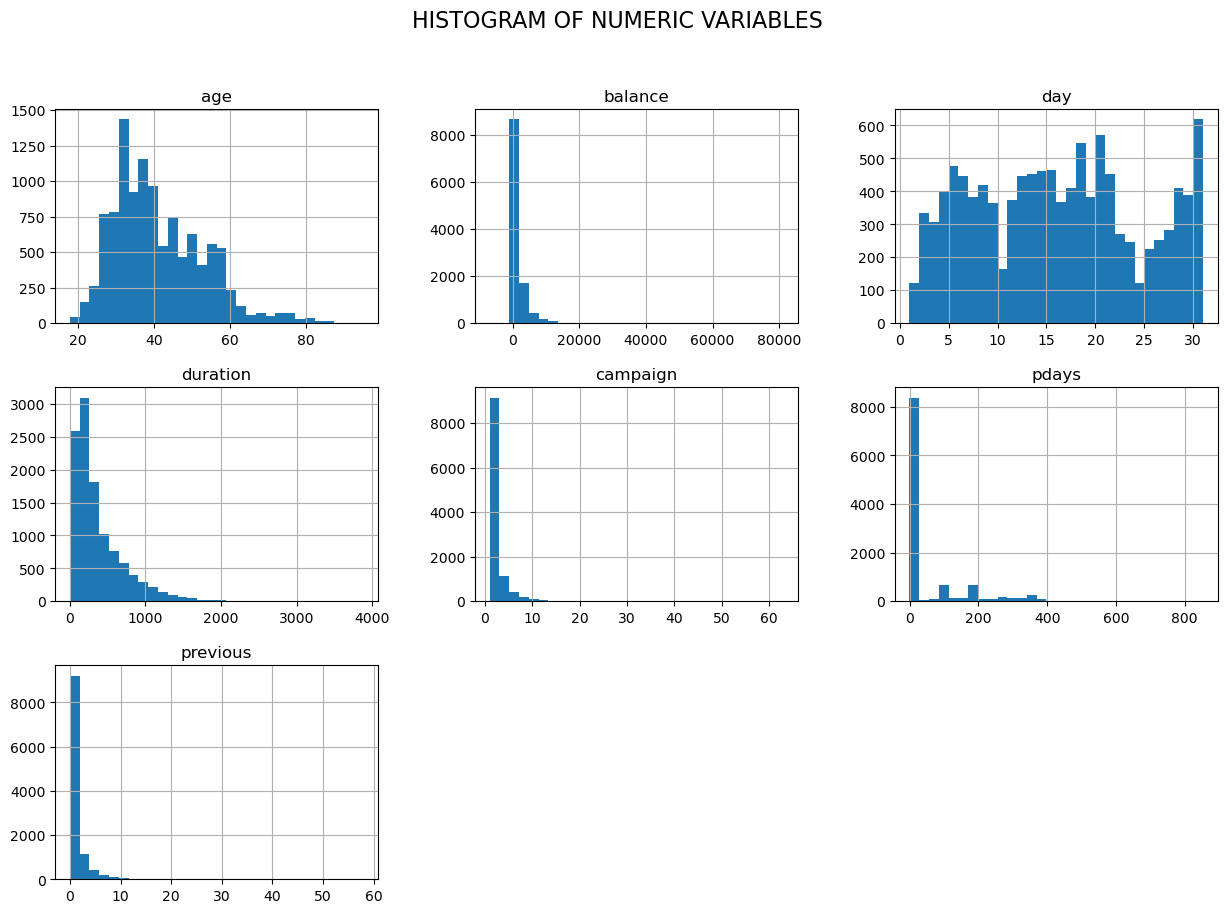

In [16]:
print("\nHISTOGRAM OF EACH NUMERIC VARIABLE")
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("HISTOGRAM OF NUMERIC VARIABLES", fontsize=16)
plt.show()

## Comptar els valors de cada variable categòrica

In [17]:
print("VALUES FOR EACH CATEGORIC VALUE")
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

VALUES FOR EACH CATEGORIC VALUE
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
suc

## Visualització de valors nuls

In [19]:
# Primero identificamos cuántos valores faltan por columna
print("\nMISSING VALUES")
print("MISSING VALUES PER COLUMN:")
missing_values = df.isnull().sum()
print(missing_values)
# Y tambíén en porcentage para saber respecto al total
print("\nPERCENTAGE OF MISSING VALUES:")
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)


MISSING VALUES
MISSING VALUES PER COLUMN:
age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

PERCENTAGE OF MISSING VALUES:
age          0.089590
job          0.000000
marital      0.044795
education    0.062713
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.000000
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000000
deposit      0.000000
dtype: float64


Debido a que el porcentaje de nulos es muy bajo, no los descartamos, ya que si rellenáramos muchos valores nulos, estaríamos introduciendo un sesgo significativo.
Para valores numéricos usamos la mediana y para valores categóricos utilizamos la moda

In [22]:
print("LET'S TREAT THE MISSING VALUES")
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:  # Numéricos
            df[col].fillna(df[col].median(), inplace=True)
        else:  # Categóricos
            df[col].fillna(df[col].mode()[0], inplace=True)

### Checkeamos que ya no tengamos valores nulos
print("\nCHECK AFTER TRANSFORMING MISSING VALUES:")
print(df.isnull().sum())

LET'S TREAT THE MISSING VALUES

CHECK AFTER TRANSFORMING MISSING VALUES:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


Ventajas: sencillo, rápido, se utilizan datos del propio dataset, van acorde a los valores ya existentes.
Inconvenientes: debemos distinguir entre numéricas y categóricas, la media es sensible a valores atípicos y puede no ser una buena representación, y la mediana cuenta con la suposición de que los datos faltantes son completamente al azar.
También podríamos haber utilizado una imputación aleatoria de muestras, porque permite numéricas y categóricas, pero tambiénm asume que la falta de datos es completamente al azar y podría inducir ruido en los datos.
No utilizaremos la imputación múltiple, porque casi todos los datos faltantes son de edad, no son múltiples variables.

## Identificación de outliers
Usaremos el método de rango intercuartílico y el boxplot para visualizarlos.
También podríamos haber utilizado gráficos de dispersión o histogramas.



OUTLIERS IDENTIFICATION

IRQ value in age:  17.0
Lower limit in age: 6.5
Upper limit age: 74.5
Outliers in age:
        age      job   marital  education default  balance housing loan  \
1162   75.0  retired  divorced    primary      no     3881     yes   no   
1236   85.0  retired   married    primary      no    12114      no   no   
1243   90.0  retired  divorced  secondary      no        1      no   no   
1274   85.0  retired  divorced    primary      no     7613      no   no   
1320   83.0  retired  divorced    primary      no     1097      no   no   
...     ...      ...       ...        ...     ...      ...     ...  ...   
10438  77.0  retired   married    primary      no     1492      no   no   
10562  88.0  retired   married    primary      no      648      no   no   
10570  77.0  unknown   married    unknown      no      397      no   no   
10618  78.0  retired   married    primary      no      680      no   no   
10843  86.0  retired  divorced    unknown      no      157   

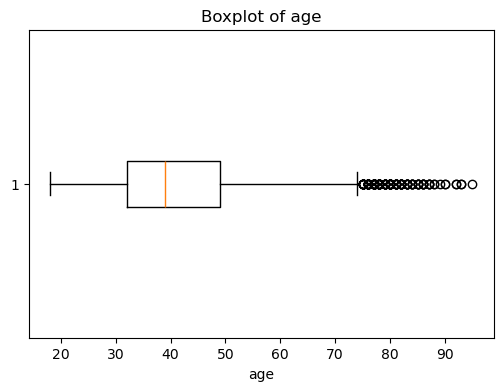

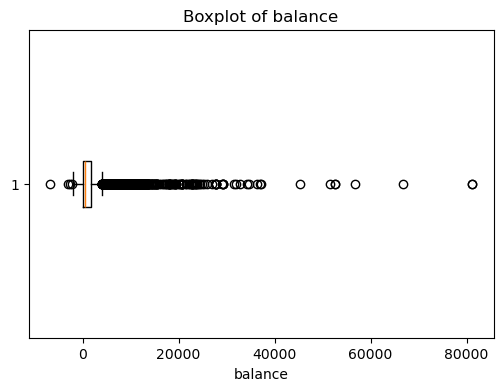

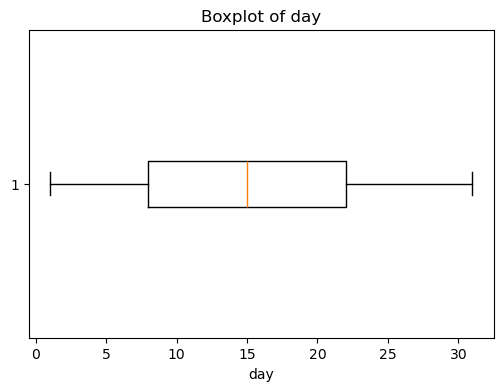

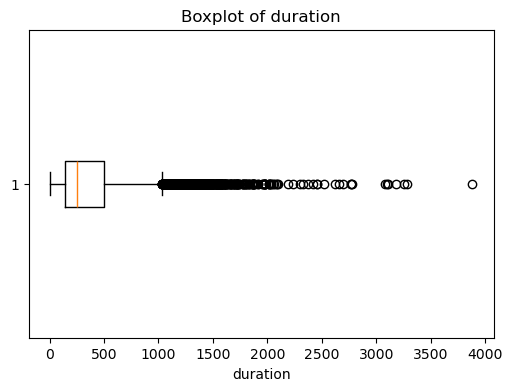

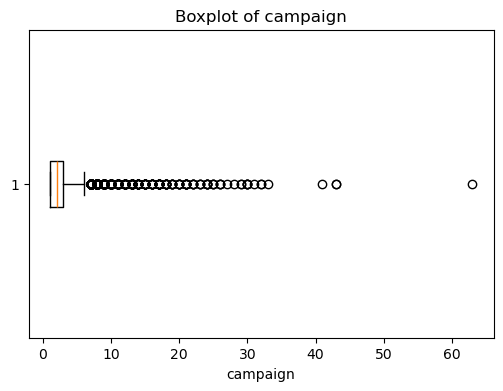

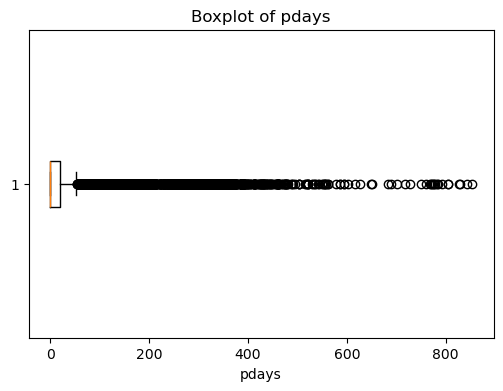

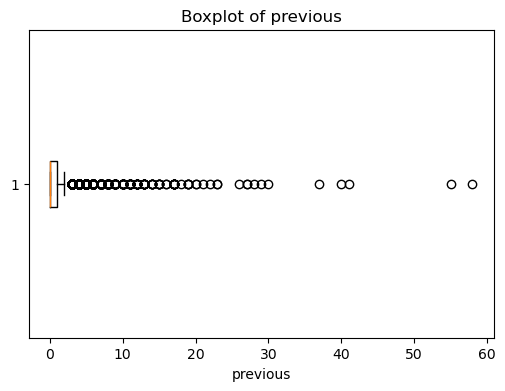

In [24]:
print("\n\nOUTLIERS IDENTIFICATION")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#### Rango intercuartílico (IQR) para detectar outliers
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25) # primer y tercer cuartil
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nIRQ value in {col}: ", IQR)
    print(f"Lower limit in {col}:", lower_bound)
    print(f"Upper limit {col}:", upper_bound)
    print(f"Outliers in {col}:")
    print(outliers[col])

#### Boxplot
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

## Tratamiento de outliers: Winsorización

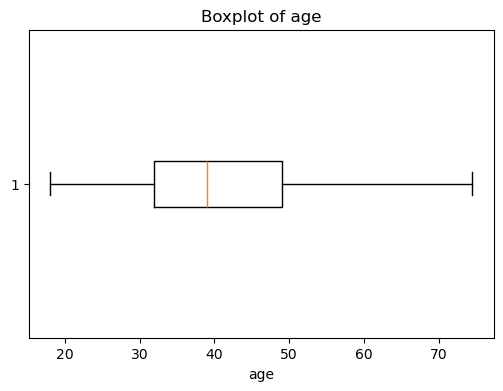

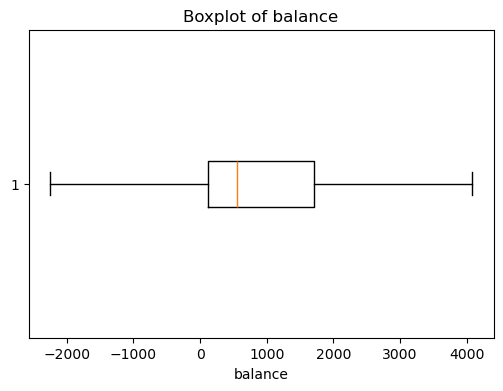

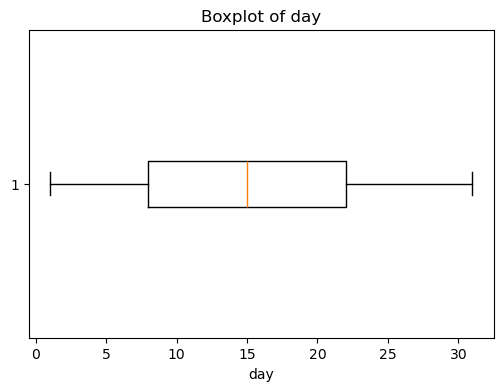

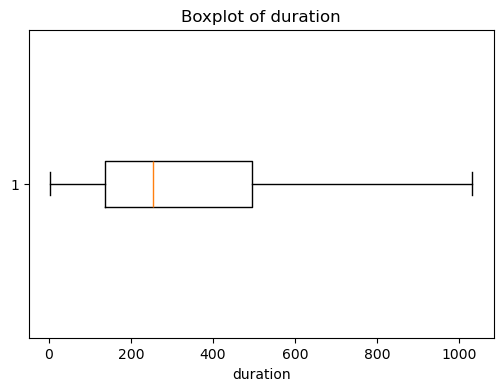

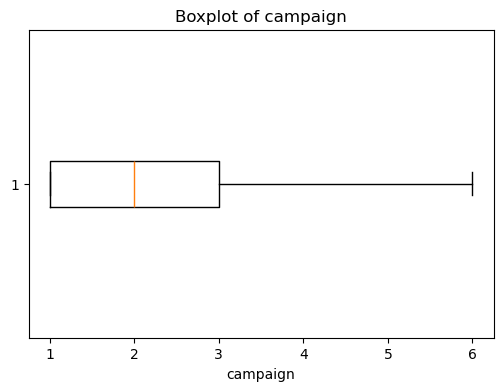

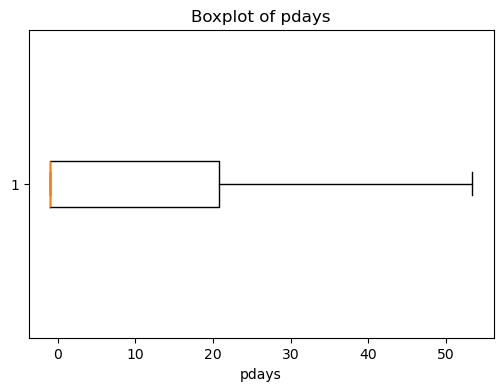

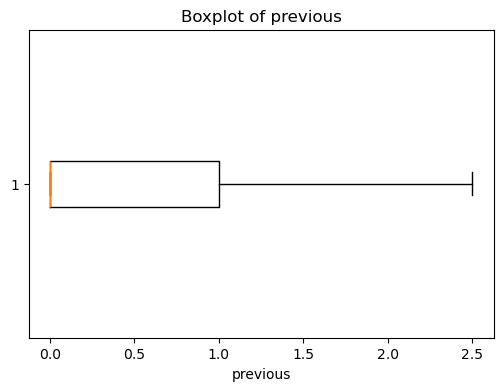

In [25]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Reemplazar outliers fuera del rango por los límites
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Verificar datos después del tratamiento
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

## Análisis de la relación entre características y variable objetivo
La variable objetivo es binaria (sí/no), por lo que lo convertiremos a valor numérico (1 para sí y 0 para no).

Para las variables numéricas utilizaremos la ANOVA y para variables categóricas utilizaremos la Chi-cuadrado


RELATIONSHIP BETWEEN NUMERICAL VARIABLES AND TARGET:


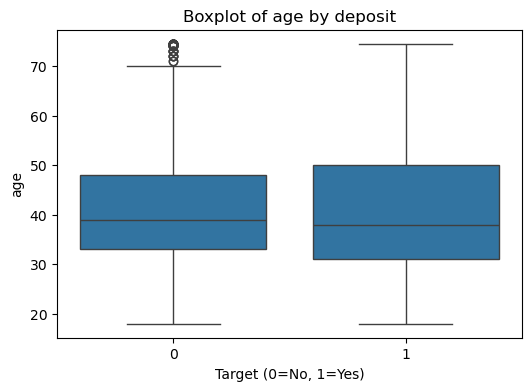

age: t-stat = 3.26, p-value = 0.0011


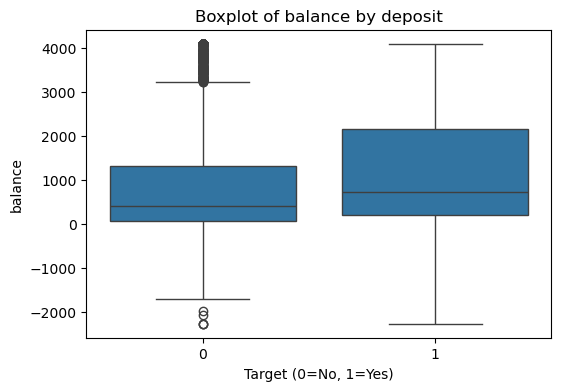

balance: t-stat = 14.64, p-value = 0.0000


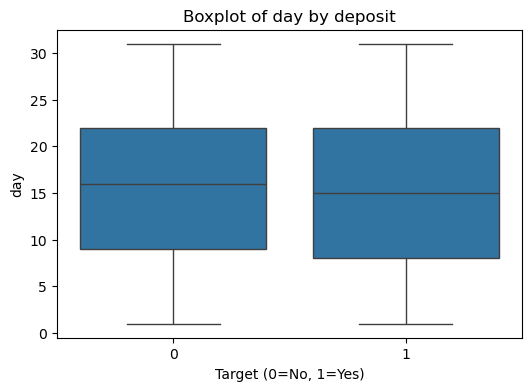

day: t-stat = -5.95, p-value = 0.0000


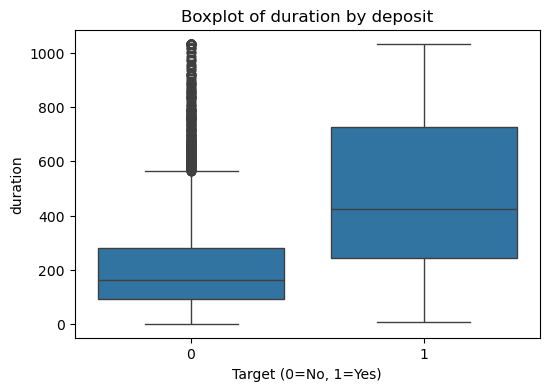

duration: t-stat = 58.44, p-value = 0.0000


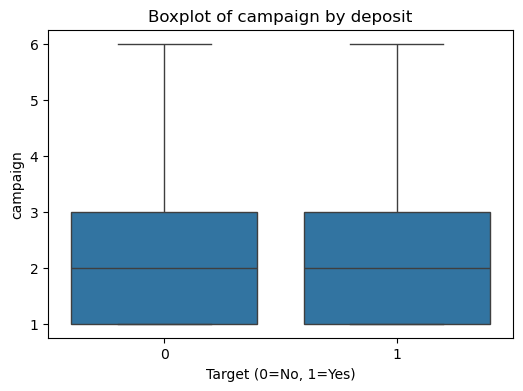

campaign: t-stat = -14.50, p-value = 0.0000


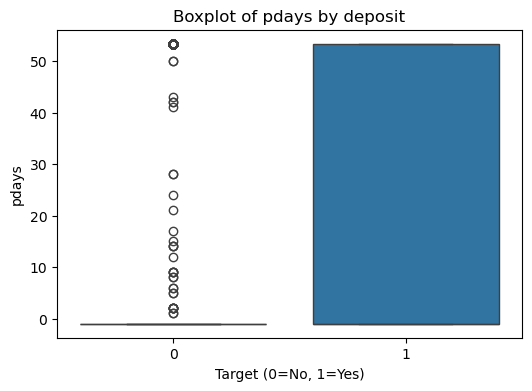

pdays: t-stat = 24.79, p-value = 0.0000


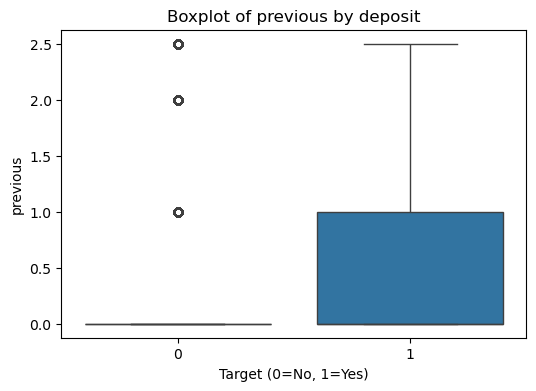

previous: t-stat = 23.42, p-value = 0.0000

RELATIONSHIP BETWEEN CATEGORICAL VARIABLES AND TARGET:
job: Chi^2 = 378.08, p-value = 0.0000


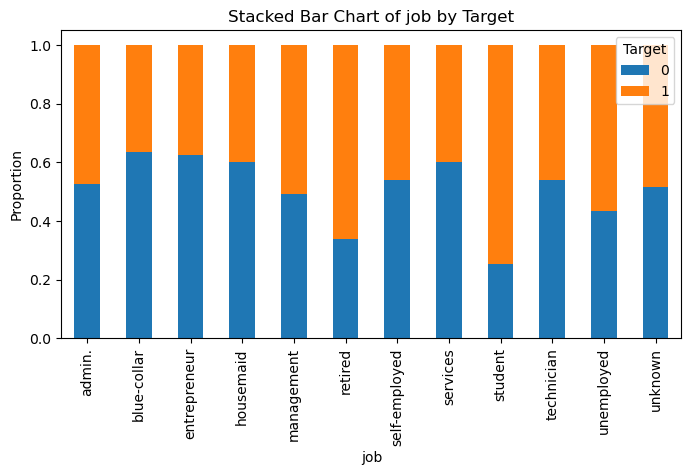

marital: Chi^2 = 108.73, p-value = 0.0000


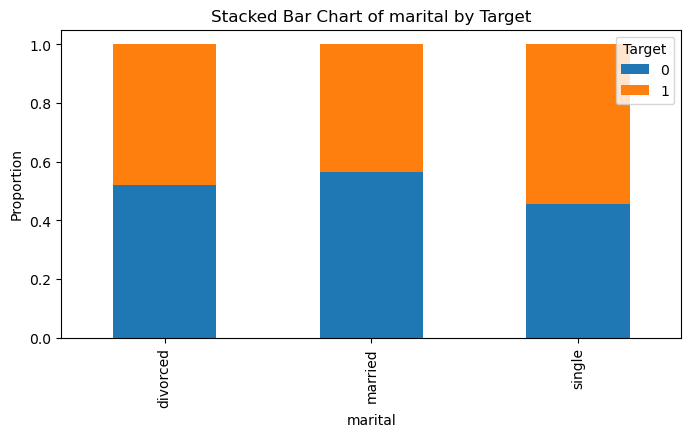

education: Chi^2 = 122.98, p-value = 0.0000


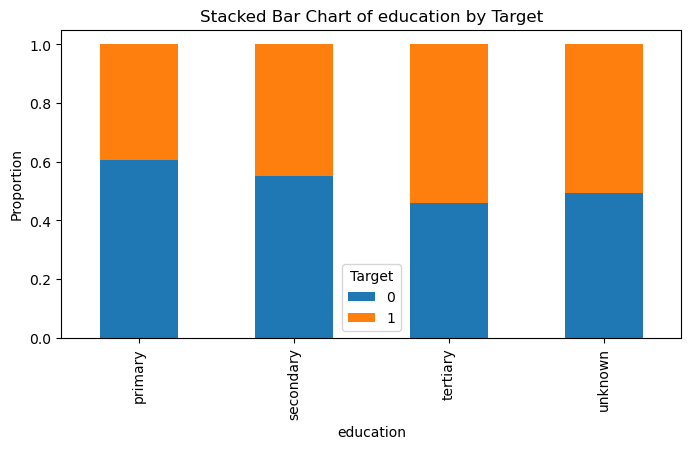

default: Chi^2 = 17.81, p-value = 0.0000


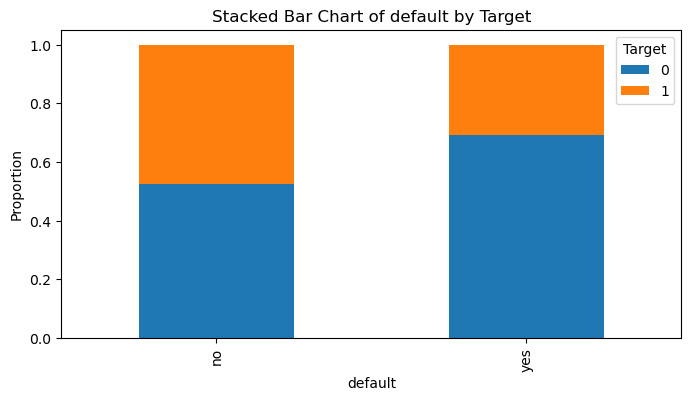

housing: Chi^2 = 463.19, p-value = 0.0000


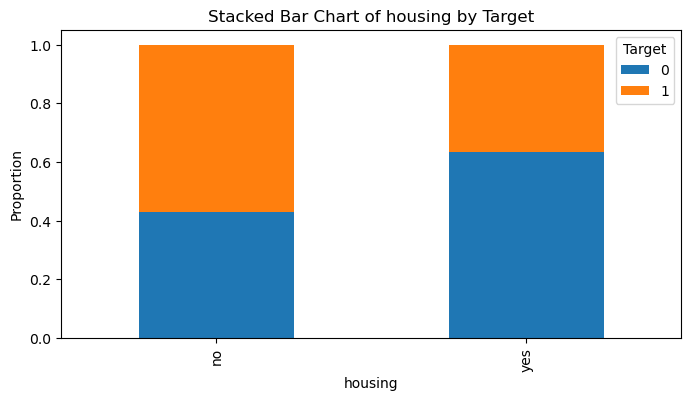

loan: Chi^2 = 135.83, p-value = 0.0000


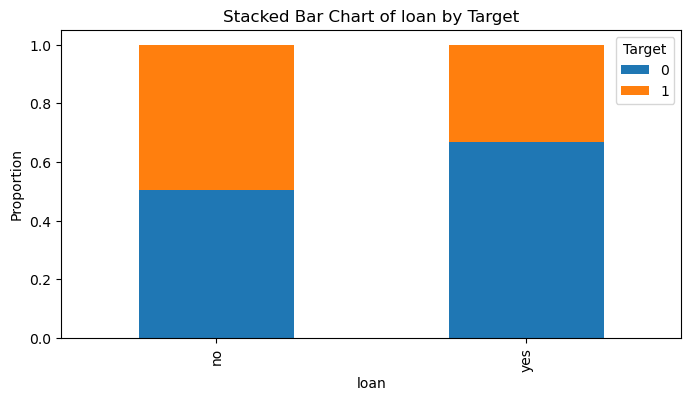

contact: Chi^2 = 736.69, p-value = 0.0000


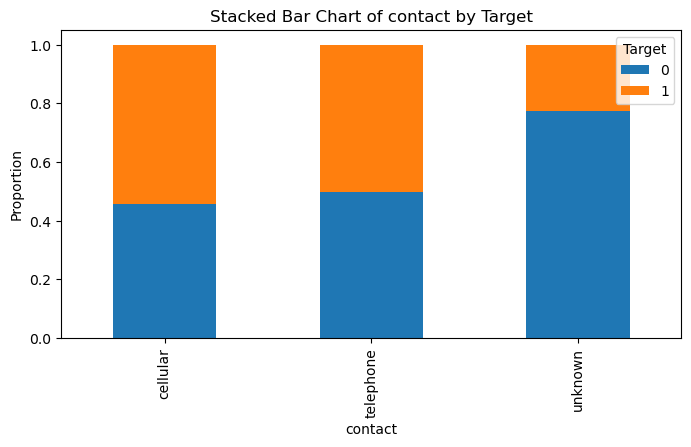

month: Chi^2 = 1046.77, p-value = 0.0000


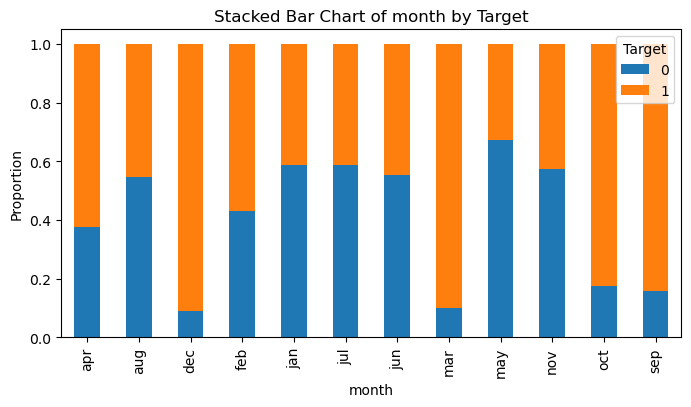

poutcome: Chi^2 = 1004.64, p-value = 0.0000


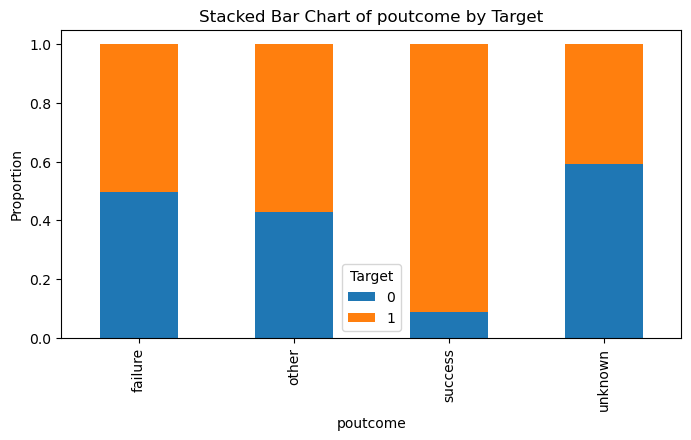

In [26]:
target = 'deposit'
df[target] = df[target].map({'yes': 1, 'no': 0})

# Separar variables
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nRELATIONSHIP BETWEEN NUMERICAL VARIABLES AND TARGET:")
for col in numeric_cols:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f"Boxplot of {col} by {target}")
        plt.xlabel("Target (0=No, 1=Yes)")
        plt.ylabel(col)
        plt.show()

        # Prueba t entre los grupos (0 y 1)
        group_yes = df[df[target] == 1][col]
        group_no = df[df[target] == 0][col]
        t_stat, p_val = ttest_ind(group_yes, group_no, equal_var=False)  # Welch's t-test
        print(f"{col}: t-stat = {t_stat:.2f}, p-value = {p_val:.4f}")

# Relación entre variables categóricas y objetivo
print("\nRELATIONSHIP BETWEEN CATEGORICAL VARIABLES AND TARGET:")
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    print(f"{col}: Chi^2 = {chi2:.2f}, p-value = {p:.4f}")
    # Lo mostramos en gráfico
    contingency_table.div(contingency_table.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f"Stacked Bar Chart of {col} by Target")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.legend(title="Target")
    plt.show()

## Desbalance de muestras
Lo haremos a partir de una recta de regresión linear porque es la más sencilla.

Valores únicos en 'deposit': [1 0]
Distribución original de la variable objetivo:
deposit
0    5873
1    5289
Name: count, dtype: int64


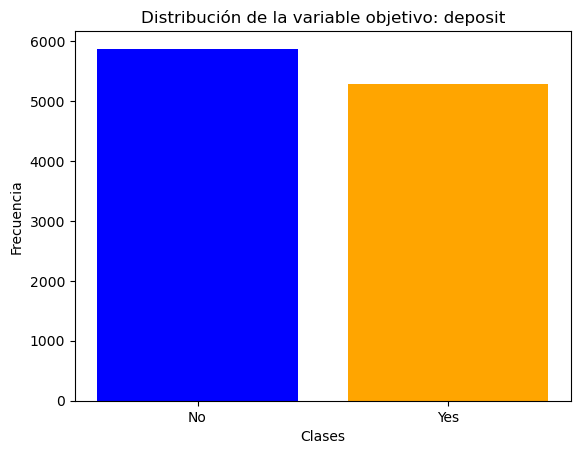


PROPORCIÓN DE LA VARIABLE OBJETIVO:
deposit
0    0.52616
1    0.47384
Name: proportion, dtype: float64
La variable objetivo no está desbalanceada. Por tanto, no es necesario corregirla.


In [57]:
df2 = pd.read_csv('bank_dataset.csv')

# Mapeo de la columna 'deposit', porque he tenido problemas con el df del inicio porque ya lo he modificado
if 'deposit' in df.columns:
    df2['deposit'] = df2['deposit'].astype(str).str.strip()  # Convertir a cadena y eliminar espacios
    df2 = df2[df2['deposit'].isin(['yes', 'no'])]  # Filtrar filas válidas
    df2['deposit'] = df2['deposit'].map({'yes': 1, 'no': 0})  # Mapear 'yes' a 1, 'no' a 0
else:
    raise ValueError("La columna 'deposit' no se encuentra en el archivo CSV.")

# Verificar la limpieza
print("Valores únicos en 'deposit':", df2['deposit'].unique())

print("Distribución original de la variable objetivo:")
print(df2['deposit'].value_counts())

def plot_distribution(data, column):
    counts = data[column].value_counts()
    plt.bar(counts.index, counts.values, color=['blue', 'orange'])
    plt.title(f"Distribución de la variable objetivo: {column}")
    plt.xlabel("Clases")
    plt.ylabel("Frecuencia")
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()

plot_distribution(df2, 'deposit')

# Calcular proporciones
proportions = df2['deposit'].value_counts(normalize=True)
print("\nPROPORCIÓN DE LA VARIABLE OBJETIVO:")
print(proportions)

# Detectar desbalance
desbalanceado = proportions.min() < 0.4

if desbalanceado: # Aplicar SMOTE
    print("La variable objetivo está desbalanceada. Corrigiengo con SMOTE...")

    X = df2.drop(columns=['deposit'])
    y = df2['deposit']

    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X, y)
    print("Nueva distribución de la variable objetivo:")
    print(Counter(y_balanced))
    balanced_data = pd.concat([pd.DataFrame(X_balanced), pd.Series(y_balanced, name='deposit')], axis=1)
    plot_distribution(balanced_data, 'deposit')
else: # No necesario aplicar smote
    print("La variable objetivo no está desbalanceada. Por tanto, no es necesario corregirla.")


## SUMMARY
1. Obtenemos información estadística general del dataset. Se obtienen los datos correctamente.
2. A la hora de buscar los valores faltantes, debemos distinguir entre variables categóricas y variables numéricas. Como los valores faltantes son muy pocos, y todos agrupados en 'age', 'marital' y 'education', utilizamos la media para valores numéricos y la moda para categóricos.
3. A diferencia de los valores faltantes, encontramos varios outliers. Hemos utilizado el IQR y el boxplot porque no sabemos si todas las variables tienen una distribución normal (por lo que no usamos histogramas), aunque podríamos haber utilizado otros métodos. Utilizamos la winsorización para solventarlo.
4. La relación entre características y variable objetivo es muy similar para todas. Para ambas, los valores no están relacionados porque el p-value es de 0. A excepción de la edad, que es el valor que parece estar más relacionado.
5. La variable objetivo no está desbalanceada, por lo que no hemos tenido que aplicar ninguna corrección.